# Лабораторная работа №5: Подготовка датасета, разметка данных в label studio

In [ ]:
# pip install libpq-dev python3-dev
# pip install label-studio
#label-studio init my_project
#label-studio start my_project

Далее сбор картинок для датасета, их разметка в label studio, настройка проекта

In [ ]:
import json
import matplotlib.pyplot as plt
import os

# Путь к файлу с данными COCO
ann_file = './lab5/result.json'

# Путь к папке с изображениями
img_folder = './images/'

# Загрузка данных COCO
with open(ann_file, 'r') as f:
    dataset = json.load(f)

# Получение списка всех категорий объектов
categories = {}

# Цикл по всем изображениям
for image in dataset['images']:
    img_path = os.path.join(img_folder, image['file_name'])
    if os.path.exists(img_path):
        for ann in image['annotations']:
            category_id = ann['category_id']
            if category_id in categories:
                categories[category_id]['count'] += 1
            else:
                categories[category_id] = {'name': ann['category_name'], 'count': 1}

# Вывод информации о датасете
print("Dataset info:")
print("Number of images:", len(dataset['images']))

Dataset info:
Number of images: 57


In [ ]:
coco=COCO(ann_file)
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
print(f"Количество категорий: {len(categories)}")
print()
print("Категории:")
print(categories)

Количество категорий: 1

Категории:
['Cat']


1470
{'id': 0, 'image_id': 1, 'category_id': 0, 'segmentation': [], 'bbox': [943.6527545909835, 417.36842105263133, 1029.1285475792995, 913.4210526315792], 'ignore': 0, 'iscrowd': 0, 'area': 940027.681223092}
[943.6527545909835, 417.36842105263133, 1029.1285475792995, 913.4210526315792]


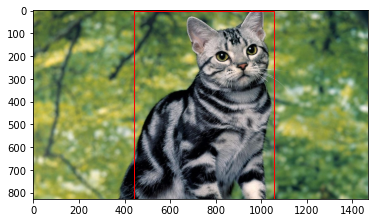

In [ ]:
import cv2
# Загрузка аннотаций из файла json
with open('./result.json', 'r') as f:
    annotations = json.load(f)

# Получение информации об изображении с индексом 0
img_info = annotations['images'][0]
img_filename = img_info['file_name']
img_width = img_info['width']
img_height = img_info['height']
print(img_width)

# Загрузка изображения с помощью OpenCV
img = cv2.imread(img_filename)
# Получение аннотаций для изображения с индексом 0
img_anns = annotations['annotations'][0]
print(img_anns)
# Отображение изображения и прямоугольников
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

bbox = img_anns['bbox']
print(bbox)
x, y, w, h = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
rect = plt.Rectangle((440, 0), 615, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()